# Introduction


In [25]:
import numpy as np

import itertools

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.preprocessing import Binarizer

%matplotlib inline

In [26]:
# dataset original source: http://yann.lecun.com/exdb/mnist/, this comes from http://mldata.org/
digits = fetch_mldata('MNIST original')


In [33]:
# let's see what we have
for x in digits:
    print(x, '\n',  digits[x])
    

DESCR 
 mldata.org dataset: mnist-original
COL_NAMES 
 ['label', 'data']
data 
 [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
target 
 [ 0.  0.  0. ...,  9.  9.  9.]


In [34]:
print("dataset size: {}".format(digits.data.shape))


dataset size: (70000, 784)


In [63]:
# I rolled dice, got 6, so it is a random number
print(digits.data[6])


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  21 176 253 253 124   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 105 176 251 251 251 251 105   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  58 217 241 253 251 251 251 251 243
 113   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  63 231 251 251 253 251 251 251 251 253 251 113   

In [64]:
random_digit = digits.data[6].reshape((28,28))

print(np.array_str(random_digit, max_line_width=200))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  21 176 253 253 124   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 105 176 251 251 251 251 105   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  58 217 241 253 251 251 251 251 243 113   5   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 231 251 251 253 251 251 251 251 25

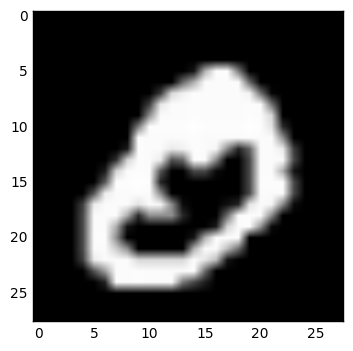

In [157]:
plt.imshow(random_digit, cmap='gray')

In [165]:

# display 9 random digits
def plot_random_digits():
    plt.figure(figsize=(8, 8))
    for d in range(0, 9):   
        plt.subplot(3, 3, d+1)
        i = np.random.randint(digits.data.shape[0])
        digit = digits.data[i]
        digit = digit.reshape((28,28))
        plt.axis("off")
        plt.title(int(digits.target[i]))
        plt.imshow(digit, cmap='gray')

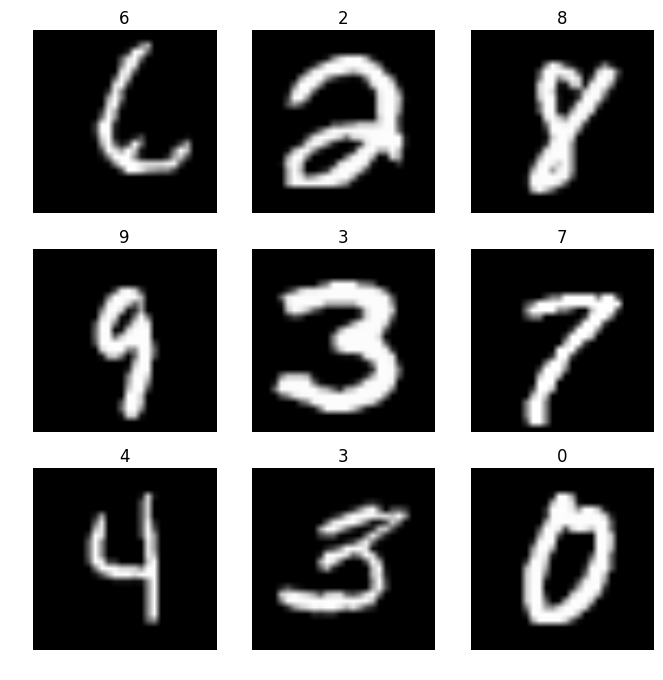

In [166]:
plot_random_digits()

In [173]:
data = digits.data / np.max(digits.data)


In [174]:
print(data[6].reshape((28,28)))

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

In [177]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target,
                                                    train_size=0.75,
                                                    test_size=0.25,
                                                    random_state=90210)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(52500, 784) (17500, 784) (52500,) (17500,)


In [335]:
np.mean(X_train)

0.13082820347186502

In [369]:
t = np.sum(X_train>0, axis=0)

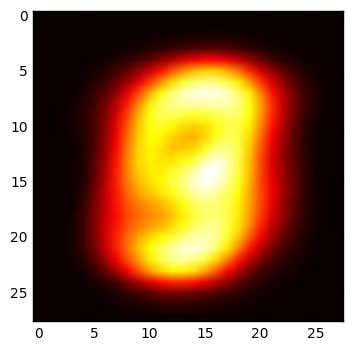

In [378]:

plt.imshow(t.reshape((28,28)), cmap='hot')

In [379]:
from sklearn.ensemble import RandomForestClassifier

In [481]:
rf = RandomForestClassifier(n_estimators=10,
                            max_features=5, 
                            max_depth=5) #

In [484]:
rf = rf.fit(X_train, y_train)

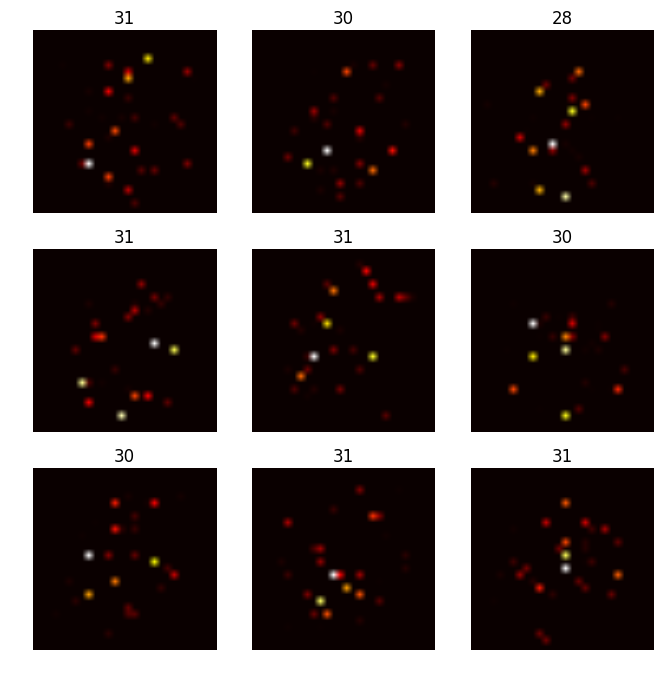

In [485]:
plt.figure(figsize=(8, 8))

for x in range(0, 9):
    feature_importances = rf.estimators_[x].feature_importances_ / np.max(rf.estimators_[x].feature_importances_)
    plt.subplot(3, 3, x+1)
    plt.axis("off")
    plt.title(sum(rf.estimators_[x].feature_importances_>0))

    plt.imshow(feature_importances.reshape((28,28)), cmap='hot')
    

In [383]:
predictions = rf.predict(X_test)

In [384]:
score_1 = sum(predictions == y_test)/len(y_test)
score_1

0.73188571428571425

In [385]:
def fit_and_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    p = model.predict(X_test)
    print(sum(p == y_test)/len(y_test))
    return model

In [453]:
rf_new = RandomForestClassifier(n_estimators=100,
                                n_jobs = 4,
                                max_depth=32, # none
                                min_samples_leaf=2, # 1
                                max_features='auto', 
                                min_impurity_split=1e-07)


In [454]:
rf_new = fit_and_predict(rf_new, X_train, y_train, X_test, y_test)

0.968


In [424]:
predictions = rf_new.predict(X_test)

In [425]:
features = rf_new.feature_importances_.reshape((28,28))

features = features/np.max(features)

In [426]:

features_old = rf.feature_importances_.reshape((28,28))
features_old = features_old/np.max(features_old)

In [427]:
diff = (features - features_old)**2
diff = diff/np.max(diff)

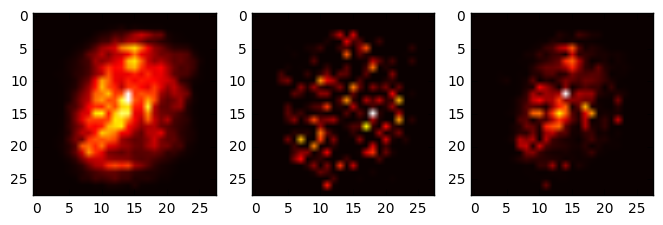

In [428]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.imshow(features, cmap='hot')
plt.subplot(1, 3, 2)
plt.imshow(features_old, cmap='hot')
plt.subplot(1, 3, 3)
plt.imshow(diff, cmap='hot')
plt.show()

In [429]:
rf_new.score(X_test, y_test)

0.96799999999999997

In [430]:
from sklearn.metrics import classification_report
labels=np.arange(10)

In [431]:
print(classification_report(y_test, predictions, labels))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1738
          1       0.99      0.99      0.99      1992
          2       0.96      0.97      0.96      1790
          3       0.96      0.95      0.96      1823
          4       0.96      0.97      0.97      1726
          5       0.97      0.96      0.96      1603
          6       0.97      0.98      0.98      1730
          7       0.97      0.96      0.97      1771
          8       0.96      0.95      0.96      1617
          9       0.95      0.95      0.95      1710

avg / total       0.97      0.97      0.97     17500



In [432]:
from sklearn.metrics import confusion_matrix


In [433]:
cm = confusion_matrix(y_test, predictions, labels)
print(cm)

[[1713    0    2    0    2    2    5    0   13    1]
 [   1 1963    4    5    5    2    3    3    3    3]
 [   8    2 1733    8    8    0   11   13    7    0]
 [   1    0   28 1739    3   20    2   14   10    6]
 [   2    3    3    0 1671    1    6    4    3   33]
 [   5    1    2   24    1 1541   11    2   13    3]
 [   7    3    2    0    3   11 1701    0    3    0]
 [   4    4   20    0    8    0    0 1708    1   26]
 [   2    1   10   16   12   12    9    1 1542   12]
 [   4    3    6   21   21    3    0   10   13 1629]]


In [434]:
cm[np.diag_indices(10)] = 0

In [435]:
cm

array([[ 0,  0,  2,  0,  2,  2,  5,  0, 13,  1],
       [ 1,  0,  4,  5,  5,  2,  3,  3,  3,  3],
       [ 8,  2,  0,  8,  8,  0, 11, 13,  7,  0],
       [ 1,  0, 28,  0,  3, 20,  2, 14, 10,  6],
       [ 2,  3,  3,  0,  0,  1,  6,  4,  3, 33],
       [ 5,  1,  2, 24,  1,  0, 11,  2, 13,  3],
       [ 7,  3,  2,  0,  3, 11,  0,  0,  3,  0],
       [ 4,  4, 20,  0,  8,  0,  0,  0,  1, 26],
       [ 2,  1, 10, 16, 12, 12,  9,  1,  0, 12],
       [ 4,  3,  6, 21, 21,  3,  0, 10, 13,  0]])

In [436]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0  0  2  0  2  2  5  0 13  1]
 [ 1  0  4  5  5  2  3  3  3  3]
 [ 8  2  0  8  8  0 11 13  7  0]
 [ 1  0 28  0  3 20  2 14 10  6]
 [ 2  3  3  0  0  1  6  4  3 33]
 [ 5  1  2 24  1  0 11  2 13  3]
 [ 7  3  2  0  3 11  0  0  3  0]
 [ 4  4 20  0  8  0  0  0  1 26]
 [ 2  1 10 16 12 12  9  1  0 12]
 [ 4  3  6 21 21  3  0 10 13  0]]


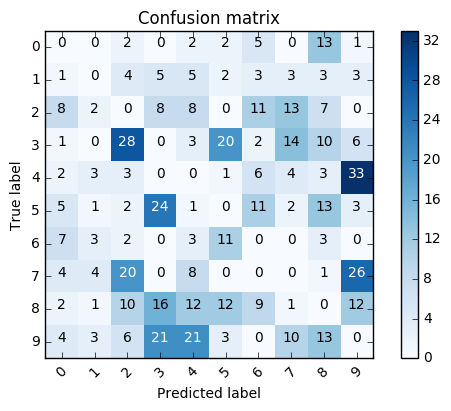

In [437]:
plot_confusion_matrix(cm, labels)

In [438]:
X_train_norm = Binarizer(threshold=0.1).fit_transform(X_train)
X_test_norm = Binarizer(threshold=0.1).fit_transform(X_test)

In [439]:
fit_and_predict(rf_new, X_train_norm, y_train, X_test_norm, y_test)

0.967828571429


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [440]:
from sklearn.decomposition import PCA

In [464]:
pca = PCA(n_components=36)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [465]:
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [466]:
rf_pca = fit_and_predict(rf_new, X_train_PCA, y_train, X_test_PCA, y_test)

0.952057142857


In [474]:
random_digit_PCA = pca.transform(random_digit.reshape(1,-1))

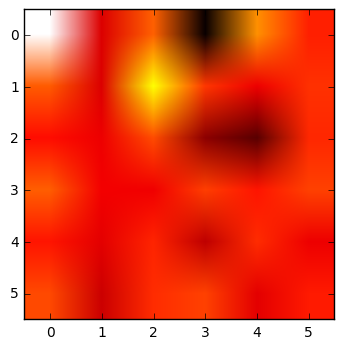

In [477]:
plt.imshow(random_digit_PCA.reshape((6,6)), cmap='hot')